In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#open file with cold vs hot scores (temp codes 0 vs 1)
path = 'C:/Users/nasha/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks'
coldhot = pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TempDat_01_alphapoint875.pkl')
coldrt = pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TempDat_02_alphapoint875.pkl')
rthot = pd.read_pickle(f'{path}/BA_TempDat/BayesScores_TempDat_21_alphapoint875.pkl')

In [3]:
#open file with quinine vs sucrose scores (tastes codes 2 vs 3)
dataset2_scores = pd.read_pickle(f'{path}/BayesScores_taste_23_alphapoint875.pkl')

In [4]:
dataset3_scores = pd.read_pickle(f'{path}/BayesScores_taste_01_alphapoint875.pkl')
dataset4_scores = pd.read_pickle(f'{path}/BayesScores_taste_02_alphapoint875.pkl')
dataset5_scores = pd.read_pickle(f'{path}/BayesScores_taste_03_alphapoint875.pkl')
dataset6_scores = pd.read_pickle(f'{path}/BayesScores_taste_12_alphapoint875.pkl')
dataset7_scores = pd.read_pickle(f'{path}/BayesScores_taste_13_alphapoint875.pkl')

In [5]:
# Example data (replace this with your actual datasets)
dataset1_scores = np.sort(coldhot[:,1])[::-1][:int(0.2*len(coldhot[:,1]))]
dataset2_scores = np.sort(dataset2_scores[:,1])[::-1][:int(0.2*len(dataset2_scores[:,1]))]
dataset3_scores = np.sort(dataset3_scores[:,1])[::-1][:int(0.2*len(dataset3_scores[:,1]))]
dataset4_scores = np.sort(dataset4_scores[:,1])[::-1][:int(0.2*len(dataset4_scores[:,1]))]
dataset5_scores = np.sort(dataset5_scores[:,1])[::-1][:int(0.2*len(dataset5_scores[:,1]))]
dataset6_scores = np.sort(dataset6_scores[:,1])[::-1][:int(0.2*len(dataset6_scores[:,1]))]
dataset7_scores = np.sort(dataset7_scores[:,1])[::-1][:int(0.2*len(dataset7_scores[:,1]))]
dataset8_scores = np.sort(coldrt[:,1])[::-1][:int(0.2*len(coldrt[:,1]))]
dataset9_scores = np.sort(rthot[:,1])[::-1][:int(0.2*len(rthot[:,1]))]


In [6]:
means_list = [np.mean(dataset1_scores),np.mean(dataset2_scores),np.mean(dataset3_scores),np.mean(dataset4_scores),np.mean(dataset5_scores),np.mean(dataset6_scores),np.mean(dataset7_scores),np.mean(dataset8_scores),np.mean(dataset9_scores)]
dataset_list = [(dataset8_scores),(dataset1_scores),(dataset9_scores),(dataset2_scores),(dataset3_scores),(dataset4_scores),(dataset5_scores),(dataset6_scores),(dataset7_scores)]

In [7]:
combined_temps = np.column_stack(((dataset1_scores),(dataset8_scores),(dataset9_scores)))
taste_data = np.column_stack(((dataset2_scores),(dataset3_scores),(dataset4_scores),(dataset5_scores),(dataset6_scores),(dataset7_scores)))

In [8]:
combined_temps

array([[1.        , 0.85      , 1.        ],
       [1.        , 0.85      , 0.98888889],
       [1.        , 0.83030303, 0.95      ],
       [0.98888889, 0.82222222, 0.94      ],
       [0.96666667, 0.78888889, 0.93939394],
       [0.94444444, 0.77777778, 0.91111111],
       [0.93888889, 0.76969697, 0.875     ],
       [0.93333333, 0.76666667, 0.86666667],
       [0.92222222, 0.75      , 0.84444444],
       [0.92222222, 0.74666667, 0.83333333],
       [0.91666667, 0.73888889, 0.82777778],
       [0.91111111, 0.73333333, 0.82222222],
       [0.91111111, 0.73333333, 0.82222222],
       [0.90555556, 0.73333333, 0.82222222],
       [0.9       , 0.73333333, 0.81666667],
       [0.89444444, 0.73333333, 0.81666667],
       [0.88888889, 0.72777778, 0.80555556],
       [0.88666667, 0.72777778, 0.80555556],
       [0.88333333, 0.72380952, 0.80555556],
       [0.87222222, 0.72380952, 0.8       ],
       [0.86666667, 0.71111111, 0.8       ],
       [0.86666667, 0.70833333, 0.8       ],
       [0.

In [9]:
np.savetxt('fig7_tempdat.csv', combined_temps, delimiter=',', fmt='%f')
np.savetxt('fig7_tastedat.csv', taste_data, delimiter=',', fmt='%f')

In [43]:
dataset_list[8].shape

(86,)

In [17]:
#do 2sided ttest for all means compared to dataset 1 
    # (the mean of the underlying distribution of the sample (a, first param) 
    # is different than the given population mean (popmean, second param.))

from scipy import stats    
    
for i in range(1,len(means_list)):
    print(stats.ttest_ind(dataset_list[0],dataset_list[i], equal_var=False))

TtestResult(statistic=-13.038230941399927, pvalue=1.2162750188771912e-26, df=153.74368976927727)
TtestResult(statistic=-7.069803176225331, pvalue=5.095310909062533e-11, df=153.75568782435198)
TtestResult(statistic=0.20419836573081587, pvalue=0.8384299722163392, df=179.38442152420467)
TtestResult(statistic=-3.382978107178784, pvalue=0.0008910886318112997, df=169.02460311596124)
TtestResult(statistic=-3.362915288050883, pvalue=0.0009542814083033447, df=168.7852686231211)
TtestResult(statistic=1.677408066389853, pvalue=0.0951158872616714, df=188.9782359485276)
TtestResult(statistic=-1.8275496080250937, pvalue=0.06926344636714815, df=181.0434019755087)
TtestResult(statistic=-1.2727054884611357, pvalue=0.2047583671765783, df=180.6226777525341)


From the documentation:
- 'The statistic is calculated as (np.mean(a) - popmean)/se, where se is the standard error. Therefore, the statistic will be positive when the sample mean is greater than the population mean and negative when the sample mean is less than the population mean.'
    - this means that, as we see in the figure below, every one of the other datasets (2-9) has a lower mean than the first dataset.
- we are comparing against a significance value of like,, 0.00625 or something similar. so all of these are much lower than this, showing that we can accept the 2-sided t ttest assumption

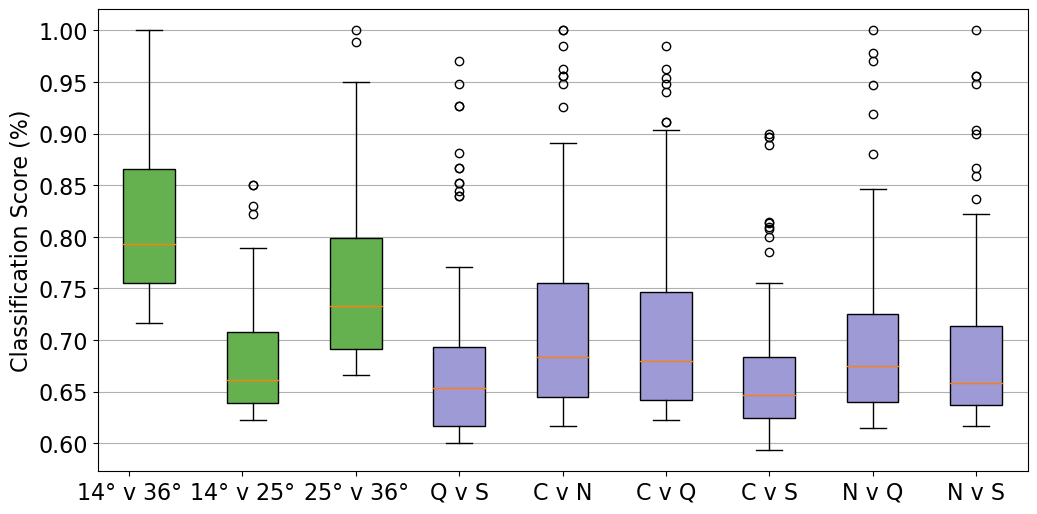

In [7]:


# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Box plot
boxplot = ax.boxplot([dataset1_scores, dataset8_scores, dataset9_scores, dataset2_scores, dataset3_scores, dataset4_scores, dataset5_scores, dataset6_scores, dataset7_scores], patch_artist=True, showmeans=False)
ax.set_xticks([0.8, 1.9, 3,4,5,6,7,8,9])  # Set explicit x-axis ticks
ax.set_xticklabels([r'$14\degree$ v $36\degree$',r'$14\degree$ v $25\degree$',r'$25\degree$ v $36\degree$', 'Q v S','C v N','C v Q','C v S','N v Q','N v S'],fontsize=16)
ax.set_ylabel('Classification Score (%)',fontsize=16)
#ax.set_title('Comparison of Classification Scores between Two Datasets')
ax.tick_params(axis='both', which='major', labelsize=16)
# Customizing box colors
colors = ['#65b14f','#65b14f','#65b14f', '#9d9ad5', '#9d9ad5', '#9d9ad5', '#9d9ad5', '#9d9ad5', '#9d9ad5']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Adding individual data points as jittered points
#for i, scores in enumerate([dataset1_scores, dataset2_scores, dataset3_scores, dataset4_scores, dataset5_scores, dataset6_scores, dataset7_scores]):
 #   x = np.random.normal(i + 1 - 0.3, 0.04, size=len(scores))  # Adjusted x positions
  #  ax.plot(x, scores, '.', color='darkblue', alpha=0.7)
    
mean1 = np.mean(dataset1_scores)
mean2 = np.mean(dataset2_scores)
#ax.text(1 + 0.35, mean1+0.02, f'Mean: {mean1:.4f}', ha='right', va='center', color='black')
#ax.text(2 + 0.35, mean2, f'Mean: {mean2:.4f}', ha='right', va='center', color='black')

#ax.axhline(y=mean1, color='blue', linestyle='--', label=f'Mean: {mean1:.4f}', xmin=0.2, xmax=0.3)
#ax.axhline(y=mean2, color='blue', linestyle='--', label=f'Mean: {mean2:.4f}', xmin=0.7, xmax=0.8)

ax.grid(axis='x', linestyle='')
plt.grid(True)
plt.show()
